In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [2]:
import matplotlib.pyplot as plt


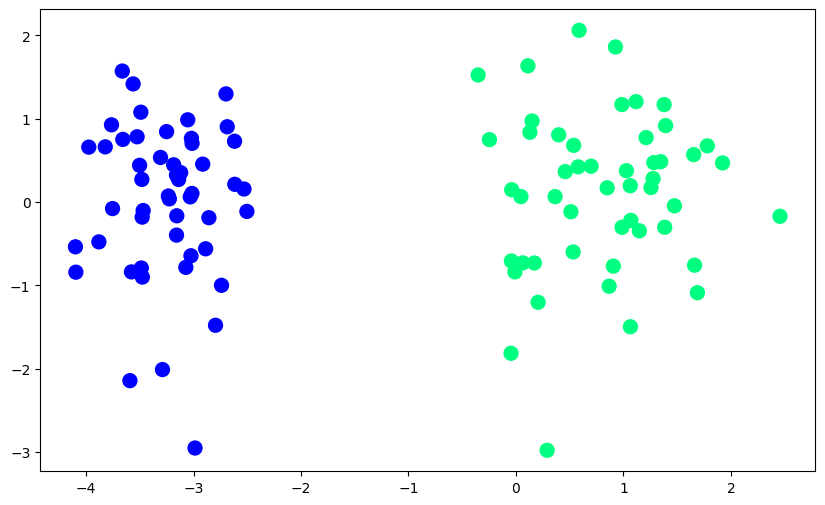

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
lor.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [5]:
print(lor.coef_)
print(lor.intercept_)

[[2.36679363 0.02300492]]
[3.13571596]


In [9]:
m=-(lor.coef_[0][0]/lor.coef_[0][1])
b=-(lor.intercept_/lor.coef_[0][1])

In [10]:
X_input=np.linspace(-4,4,100)
y_input=m*X_input+b

In [18]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [19]:
def GDLoR(X,y):

    X=np.insert(X,0,1,axis=1)
    lr=0.1
    weights=np.ones(X.shape[1])

    for i in range(1000):
        y_hat=sigmoid(np.dot(X,weights))
        weights=weights+lr*(np.dot((y-y_hat),X))/X.shape[0]
    
    return weights[1:],weights[0]

In [20]:
coef,intercept=GDLoR(X,y)

In [21]:
coef

array([2.83401947, 0.12547361])

In [22]:
intercept

np.float64(2.834271094256735)

In [23]:
m1=-(coef[0]/coef[1])
b1=-(intercept/coef[1])

In [24]:
X_input1=np.linspace(-4,4,100)
y_input1=m1*X_input1+b1

(-3.0, 2.0)

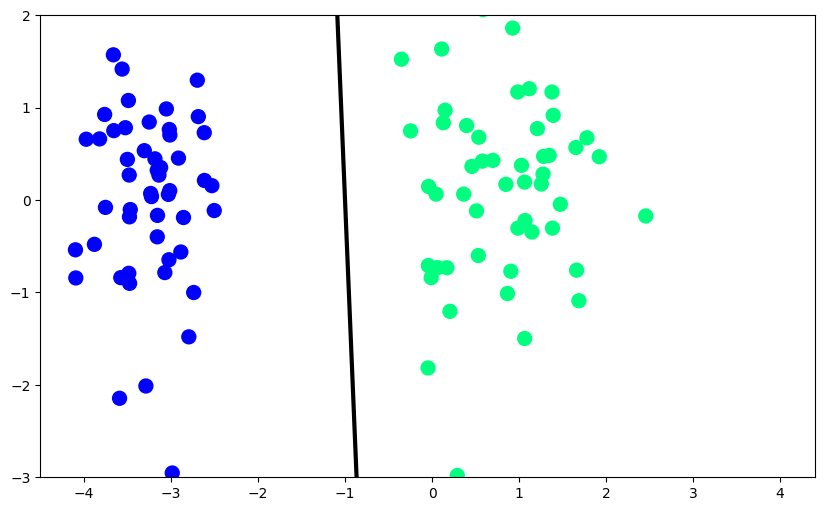

In [26]:
plt.figure(figsize=(10,6))
# plt.plot(X_input,y_input,color='red',linewidth=3)
plt.plot(X_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)